<a href="https://colab.research.google.com/github/ykitaguchi77/statistics_for_articles/blob/main/Blepharoptosis_SPK_0125.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**眼瞼下垂SPK解析**

In [ ]:
# prompt: google driveをマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**データの確認**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

xlsx_path = "/content/drive/Shareddrives/岩崎Dr_IgG4 deulk/眼瞼下垂/ドライアイ/眼瞼下垂iwasaki0125.xlsx"

In [ ]:
excel_data = pd.ExcelFile(xlsx_path)

# Display sheet names to understand the structure of the file
excel_data.sheet_names

# Load the content of the 'all' sheet to examine its structure and data
all_data = pd.read_excel(xlsx_path, sheet_name='all', header=0)

# Display the first few rows of the 'all' sheet to understand its content
all_data.head()

,ID,name,date,手術側,birthday,age,sex,side,眼科既往歴,眼瞼手術歴あり,...,levator_function pre,levator_function post,SPK pre,SPK post,BUT pre,BUT post,点眼薬 pre,Unnamed: 30,点眼薬 post,Unnamed: 32
0,11415716.0,ｺﾔﾏﾖｼﾀｶ,20171013,R,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,L,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2324306.0,ﾁｬﾊﾞﾀﾅﾙﾐ,20171215,R,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,L,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11443881.0,ﾔﾌﾞﾓﾄﾅﾂﾐ,20171215,R,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Filter rows where both 'BUT pre' and 'BUT post' are non-missing, while keeping all columns
valid_but_rows_full = all_data.dropna(subset=['BUT pre', 'BUT post', 'levator_function pre'])

# 行数をカウント
valid_but_count = valid_but_rows_full.shape[0]

# 結果を出力
print(f"'BUT pre' と 'BUT post' が揃っている行数: {valid_but_count}")

valid_but_rows_full

'BUT pre' と 'BUT post' が揃っている行数: 99


,ID,name,date,手術側,birthday,age,sex,side,眼科既往歴,眼瞼手術歴あり,...,levator_function pre,levator_function post,SPK pre,SPK post,BUT pre,BUT post,点眼薬 pre,Unnamed: 30,点眼薬 post,Unnamed: 32
71,6955163.0,ｳｴｻｶﾌｻｵ,20190404,R,NaN,71.0,0.0,1.0,R)白内障術後,NaN,...,9.0,NaN,0,0.0,10.0,10.0,0.0,NaN,0.0,NaN
72,NaN,NaN,NaN,L,NaN,71.0,0.0,0.0,L)白内障術後,NaN,...,9.0,NaN,0,0.0,10.0,10.0,0.0,NaN,0.0,NaN
83,3734308.0,ﾅｶﾑﾗﾏﾘ,20190523,R,19601005.0,58.0,1.0,1.0,R)白内障術後・R)強膜炎,NaN,...,11.0,NaN,1,1.0,3.0,3.0,1.0,ヒアレイン,1.0,ムコスタ
95,8732832.0,ﾀｻｶﾖｼﾏｻ,20190627,R,NaN,83.0,0.0,1.0,R)BRVO,NaN,...,9.0,NaN,0,0.0,3.0,3.0,0.0,NaN,0.0,NaN
102,9606364.0,ｷﾄｳタケシ,20190730,R,NaN,75.0,0.0,1.0,R)白内障術後・R)occult CNV,NaN,...,9.0,NaN,0,1.0,3.0,2.0,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,10947251.0,ﾀﾏﾉｲ ﾄﾐｺ,2024-07-16 14:24:00,R,NaN,NaN,1.0,1.0,R)白内障術後,NaN,...,10.0,NaN,0,0.0,2.0,7.0,1.0,ジクアスLX,1.0,ジクアスLX
602,NaN,NaN,NaN,L,NaN,NaN,1.0,0.0,L)白内障術後,NaN,...,10.0,NaN,0,0.0,2.0,10.0,1.0,ジクアスLX,1.0,ジクアスLX
605,10394497.0,ﾌｼﾞﾀ ﾋﾛｺ,2024-07-30 15:35:00,R,19560110.0,68.0,1.0,1.0,R)DME,NaN,...,11.0,NaN,1,1.0,3.0,4.0,0.0,NaN,0.0,NaN
606,NaN,NaN,NaN,L,NaN,68.0,1.0,0.0,L)DME,NaN,...,11.0,NaN,1,0.0,3.0,4.0,0.0,NaN,0.0,NaN


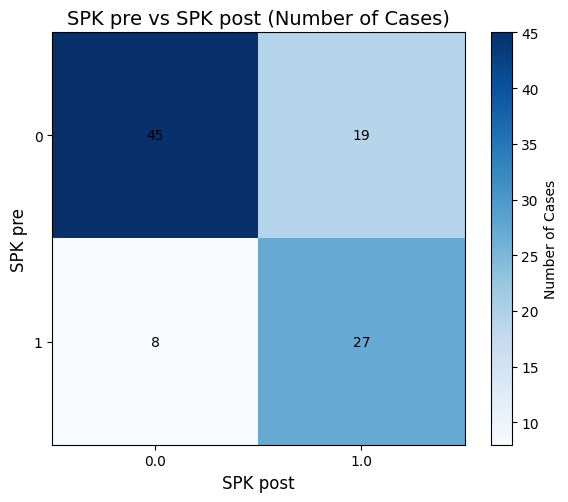

In [ ]:
# Re-attempt filtering rows with valid 'SPK pre' and 'SPK post'
valid_spk_data = valid_but_rows_full[['SPK pre', 'SPK post']].dropna()

# Create a contingency table (matrix) for 'SPK pre' and 'SPK post'
spk_matrix = pd.crosstab(valid_spk_data['SPK pre'], valid_spk_data['SPK post'])

# Plot the matrix as a heatmap
plt.figure(figsize=(6, 5))
plt.imshow(spk_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar(label='Number of Cases')
plt.xticks(range(len(spk_matrix.columns)), spk_matrix.columns, fontsize=10)
plt.yticks(range(len(spk_matrix.index)), spk_matrix.index, fontsize=10)
plt.xlabel('SPK post', fontsize=12)
plt.ylabel('SPK pre', fontsize=12)
plt.title('SPK pre vs SPK post (Number of Cases)', fontsize=14)

# Annotate matrix values
for i in range(len(spk_matrix.index)):
    for j in range(len(spk_matrix.columns)):
        plt.text(
            j, i, spk_matrix.iloc[i, j],
            ha='center', va='center', color='black', fontsize=10
        )

plt.tight_layout()
plt.show()


In [ ]:
# SPK pre列を数値型に変換（必要に応じてエラーをNaNにする）
valid_but_rows_full['SPK pre'] = pd.to_numeric(valid_but_rows_full['SPK pre'], errors='coerce')

# ΔMRD-1およびΔMRD-2を計算
valid_but_rows_full.loc[:, 'ΔMRD-1'] = valid_but_rows_full['MRD-1 3M'] - valid_but_rows_full['MRD-1 pre']
valid_but_rows_full.loc[:, 'ΔMRD-2'] = valid_but_rows_full['MRD-2 3M'] - valid_but_rows_full['MRD-2 pre']

# 点眼薬 pre と 点眼薬 post の欠損値を 0 で補填
valid_but_rows_full['点眼薬 pre'] = valid_but_rows_full['点眼薬 pre'].fillna(0)
valid_but_rows_full['点眼薬 post'] = valid_but_rows_full['点眼薬 post'].fillna(0)

# 'levator_function post'を関連列から除外
adjusted_relevant_columns = [
    'sex','age','side','MRD-1 pre', 'MRD-1 3M', 'ΔMRD-1',
    'MRD-2 pre', 'MRD-2 3M', 'ΔMRD-2',
    'levator_function pre', 'SPK pre', 'SPK post', 'BUT pre', 'BUT post', '点眼薬 pre', '点眼薬 post'
]

# 調整した関連列のNaNを削除
adjusted_valid_data = valid_but_rows_full[adjusted_relevant_columns].dropna()

# 調整後のデータの記述統計量を計算
adjusted_statistics = adjusted_valid_data.describe()

# 各列の欠損値の数を計算
adjusted_missing_values = valid_but_rows_full[adjusted_relevant_columns].isna().sum()

# 統計量と欠損値を結合
adjusted_statistics_with_missing = pd.concat(
    [adjusted_statistics, adjusted_missing_values.rename('Missing Values').to_frame().T]
)

# 結果を出力
adjusted_statistics_with_missing


<ipython-input-6-d3c956644a85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_but_rows_full['SPK pre'] = pd.to_numeric(valid_but_rows_full['SPK pre'], errors='coerce')
<ipython-input-6-d3c956644a85>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_but_rows_full['点眼薬 pre'] = valid_but_rows_full['点眼薬 pre'].fillna(0)
<ipython-input-6-d3c956644a85>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,sex,age,side,MRD-1 pre,MRD-1 3M,ΔMRD-1,MRD-2 pre,MRD-2 3M,ΔMRD-2,levator_function pre,SPK pre,SPK post,BUT pre,BUT post,点眼薬 pre,点眼薬 post
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.622222,75.522222,0.500000,0.300000,3.133333,2.833333,4.711111,4.788889,0.077778,9.555556,0.333333,0.444444,4.344444,5.011111,0.277778,0.300000
std,0.487548,8.074412,0.502801,1.407843,0.959283,1.412226,0.854525,0.661874,0.485238,2.157355,0.474045,0.499688,2.652796,2.510627,0.450412,0.460825
min,0.000000,42.000000,0.000000,-4.000000,1.000000,0.000000,2.500000,3.500000,-1.000000,5.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
25%,0.000000,71.000000,0.000000,-0.500000,3.000000,2.000000,4.000000,4.500000,0.000000,8.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,1.000000,75.000000,0.500000,0.500000,3.000000,2.500000,5.000000,5.000000,0.000000,9.000000,0.000000,0.000000,3.000000,4.000000,0.000000,0.000000
75%,1.000000,80.000000,1.000000,1.000000,4.000000,3.375000,5.500000,5.000000,0.500000,11.000000,1.000000,1.000000,5.000000,7.000000,1.000000,1.000000
max,1.000000,94.000000,1.000000,3.000000,5.500000,7.500000,7.000000,6.500000,2.000000,15.000000,1.000000,1.000000,10.000000,10.000000,1.000000,1.000000
Missing Values,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#**クリーニングデータの解析**

1. 前後のSPKが揃っている

2. 他の値に欠損がない

In [ ]:
import pandas as pd

# Load the Excel file and the specific sheet
xlsx_path = "/content/drive/Shareddrives/岩崎Dr_IgG4 deulk/眼瞼下垂/ドライアイ/眼瞼下垂iwasaki0125.xlsx"
excel_data = pd.ExcelFile(xlsx_path)
all_data = pd.read_excel(xlsx_path, sheet_name='all', header=0)

# Filter rows with non-missing 'BUT pre', 'BUT post', and 'levator_function pre'
valid_but_rows_full = all_data.dropna(subset=['BUT pre', 'BUT post', 'levator_function pre']).copy()

# Calculate ΔMRD-1 and ΔMRD-2
valid_but_rows_full.loc[:, 'ΔMRD-1'] = valid_but_rows_full['MRD-1 3M'] - valid_but_rows_full['MRD-1 pre']
valid_but_rows_full.loc[:, 'ΔMRD-2'] = valid_but_rows_full['MRD-2 3M'] - valid_but_rows_full['MRD-2 pre']

# 点眼薬 pre と 点眼薬 post の欠損値を 0 で補填
valid_but_rows_full['点眼薬 pre'] = valid_but_rows_full['点眼薬 pre'].fillna(0)
valid_but_rows_full['点眼薬 post'] = valid_but_rows_full['点眼薬 post'].fillna(0)

# Define relevant columns
relevant_columns = [
    'sex','age','side','MRD-1 pre', 'MRD-1 3M', 'ΔMRD-1',
    'MRD-2 pre', 'MRD-2 3M', 'ΔMRD-2',
    'levator_function pre', 'SPK pre', 'SPK post', 'BUT pre', 'BUT post', '点眼薬 pre', '点眼薬 post'
]

# Strict filtering: Drop rows with missing values across all relevant columns and reindex
cleaned_data = valid_but_rows_full[relevant_columns].dropna(how='any').reset_index(drop=True)

# Display the cleaned data
cleaned_data

,sex,age,side,MRD-1 pre,MRD-1 3M,ΔMRD-1,MRD-2 pre,MRD-2 3M,ΔMRD-2,levator_function pre,SPK pre,SPK post,BUT pre,BUT post,点眼薬 pre,点眼薬 post
0,0.0,71.0,1.0,-0.5,2.0,2.5,4.5,4.5,0.0,9.0,0,0.0,10.0,10.0,0.0,0.0
1,0.0,71.0,0.0,0.5,2.0,1.5,4.5,4.5,0.0,9.0,0,0.0,10.0,10.0,0.0,0.0
2,1.0,58.0,1.0,1.0,4.0,3.0,7.0,6.5,-0.5,11.0,1,1.0,3.0,3.0,1.0,1.0
3,0.0,83.0,1.0,-1.0,4.0,5.0,4.5,4.0,-0.5,9.0,0,0.0,3.0,3.0,0.0,0.0
4,0.0,75.0,1.0,0.5,3.0,2.5,5.0,5.0,0.0,9.0,0,1.0,3.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1.0,74.0,1.0,0.5,3.5,3.0,3.0,3.5,0.5,10.0,1,0.0,2.0,3.0,1.0,0.0
86,1.0,74.0,0.0,0.5,3.5,3.0,3.0,3.5,0.5,10.0,1,0.0,3.0,3.0,1.0,0.0
87,1.0,68.0,1.0,0.5,4.5,4.0,4.5,4.5,0.0,11.0,1,1.0,3.0,4.0,0.0,0.0
88,1.0,68.0,0.0,0.5,4.5,4.0,4.5,4.5,0.0,11.0,1,0.0,3.0,4.0,0.0,0.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 50.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


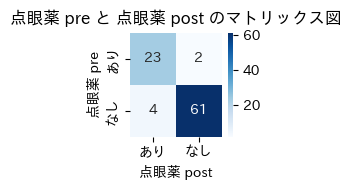

In [ ]:
#途中から点眼を始めた人、止めた人の確認

import matplotlib.pyplot as plt
import seaborn as sns
!pip install japanize-matplotlib --q
import japanize_matplotlib

# Replace 0.0 with 'なし' and 1.0 with 'あり' in '点眼薬 pre' and '点眼薬 post'
cleaned_data['点眼薬 pre'] = cleaned_data['点眼薬 pre'].replace({0.0: 'なし', 1.0: 'あり'})
cleaned_data['点眼薬 post'] = cleaned_data['点眼薬 post'].replace({0.0: 'なし', 1.0: 'あり'})

# Recreate the crosstab (matrix) after replacing values
eye_drop_matrix = pd.crosstab(cleaned_data['点眼薬 pre'], cleaned_data['点眼薬 post'])

# Plot the heatmap with updated labels
plt.figure(figsize=(2, 2))
sns.heatmap(eye_drop_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('点眼薬 pre と 点眼薬 post のマトリックス図')
plt.xlabel('点眼薬 post')
plt.ylabel('点眼薬 pre')
plt.tight_layout()
plt.show()



In [ ]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

# Filter the data where SPK pre == 0
filtered_data = cleaned_data[cleaned_data['SPK pre'] == 0]

# Separate groups by SPK post values (0 and 1)
group_0 = filtered_data[filtered_data['SPK post'] == 0]
group_1 = filtered_data[filtered_data['SPK post'] == 1]
print(f"SPK post (-): {len(group_0)}")
print(f"SPK post (+): {len(group_1)}")

# List of numerical variables to compare
numerical_vars = ['sex','age','side','MRD-1 pre', 'MRD-1 3M', 'ΔMRD-1', 'MRD-2 pre', 'MRD-2 3M',
                  'ΔMRD-2', 'levator_function pre', 'BUT pre', 'BUT post']

# Initialize results dictionary
results = []

# Perform statistical tests for each variable
for var in numerical_vars:
    # Check normality for both groups
    normality_0 = shapiro(group_0[var])[1] > 0.05
    normality_1 = shapiro(group_1[var])[1] > 0.05

    if normality_0 and normality_1:
        # Check variance equality
        equal_var = levene(group_0[var], group_1[var])[1] > 0.05
        # Perform t-test
        stat, p_value = ttest_ind(group_0[var], group_1[var], equal_var=equal_var)
        test_used = "t-test"
    else:
        # Perform Mann-Whitney U test
        stat, p_value = mannwhitneyu(group_0[var], group_1[var])
        test_used = "Mann-Whitney U"

    results.append({
        "Variable": var,
        "Test Used": test_used,
        "Statistic": stat,
        "P-Value": p_value,
        "SPK- (Group 0)": normality_0,
        "SPK+ (Group 1)": normality_1
    })

# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results)

results_df

SPK post (-): 42
SPK post (+): 18


,Variable,Test Used,Statistic,P-Value,SPK- (Group 0),SPK+ (Group 1)
0,sex,Mann-Whitney U,345.000000,0.542968,False,False
1,age,Mann-Whitney U,278.000000,0.107757,False,True
2,side,Mann-Whitney U,327.000000,0.346686,False,False
3,MRD-1 pre,Mann-Whitney U,436.500000,0.343521,False,True
4,MRD-1 3M,Mann-Whitney U,368.500000,0.880606,False,False
5,ΔMRD-1,Mann-Whitney U,285.500000,0.133767,False,True
6,MRD-2 pre,Mann-Whitney U,307.000000,0.241550,False,True
7,MRD-2 3M,Mann-Whitney U,320.000000,0.333313,False,True
8,ΔMRD-2,Mann-Whitney U,461.000000,0.137900,False,False
9,levator_function pre,t-test,2.401987,0.019530,True,True


In [ ]:
import numpy as np
from scipy.stats import t

# Add confidence interval calculation to results
detailed_results = []

for result in results:
    var = result['Variable']
    group_0_values = group_0[var].dropna()
    group_1_values = group_1[var].dropna()

    if result["Test Used"] == "t-test":
        # Calculate means and standard errors
        mean_0 = np.mean(group_0_values)
        mean_1 = np.mean(group_1_values)
        se_0 = np.std(group_0_values, ddof=1) / np.sqrt(len(group_0_values))
        se_1 = np.std(group_1_values, ddof=1) / np.sqrt(len(group_1_values))

        # Calculate confidence intervals
        df = len(group_0_values) + len(group_1_values) - 2
        t_value = t.ppf(0.975, df)
        ci_0 = (mean_0 - t_value * se_0, mean_0 + t_value * se_0)
        ci_1 = (mean_1 - t_value * se_1, mean_1 + t_value * se_1)
    else:
        # For Mann-Whitney U test, report medians and IQRs
        mean_0 = np.median(group_0_values)
        mean_1 = np.median(group_1_values)
        ci_0 = (np.percentile(group_0_values, 25), np.percentile(group_0_values, 75))
        ci_1 = (np.percentile(group_1_values, 25), np.percentile(group_1_values, 75))

    detailed_results.append({
        "Variable": var,
        "Test Used": result["Test Used"],
        "Statistic": result["Statistic"],
        "P-Value": result["P-Value"],
        "SPK- (Group 0) Mean/Median": mean_0,
        "SPK+ (Group 1) Mean/Median": mean_1,
        "SPK- (Group 0) CI (95%)": ci_0,
        "SPK+ (Group 1) CI (95%)": ci_1
    })

# Convert to DataFrame for display
detailed_results_df = pd.DataFrame(detailed_results)

detailed_results_df

,Variable,Test Used,Statistic,P-Value,SPK- (Group 0) Mean/Median,SPK+ (Group 1) Mean/Median,SPK- (Group 0) CI (95%),SPK+ (Group 1) CI (95%)
0,sex,Mann-Whitney U,345.000000,0.542968,1.00000,1.000000,"(0.0, 1.0)","(0.0, 1.0)"
1,age,Mann-Whitney U,278.000000,0.107757,74.50000,77.000000,"(71.0, 79.0)","(74.25, 83.75)"
2,side,Mann-Whitney U,327.000000,0.346686,0.00000,1.000000,"(0.0, 1.0)","(0.0, 1.0)"
3,MRD-1 pre,Mann-Whitney U,436.500000,0.343521,1.00000,0.500000,"(-0.375, 1.5)","(0.0, 1.0)"
4,MRD-1 3M,Mann-Whitney U,368.500000,0.880606,3.00000,3.000000,"(3.0, 3.875)","(3.0, 3.875)"
5,ΔMRD-1,Mann-Whitney U,285.500000,0.133767,2.25000,3.000000,"(1.625, 3.0)","(2.5, 3.75)"
6,MRD-2 pre,Mann-Whitney U,307.000000,0.241550,5.00000,5.000000,"(4.5, 5.0)","(4.5, 5.5)"
7,MRD-2 3M,Mann-Whitney U,320.000000,0.333313,5.00000,5.000000,"(4.5, 5.0)","(4.625, 5.5)"
8,ΔMRD-2,Mann-Whitney U,461.000000,0.137900,0.00000,0.000000,"(0.0, 0.0)","(-0.5, 0.0)"
9,levator_function pre,t-test,2.401987,0.019530,10.02381,8.722222,"(9.431101999715388, 10.61651704790366)","(7.809563181769742, 9.634881262674702)"


<ipython-input-7-9b1c30fd309d>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['SPK post = 0', 'SPK post = 1'])


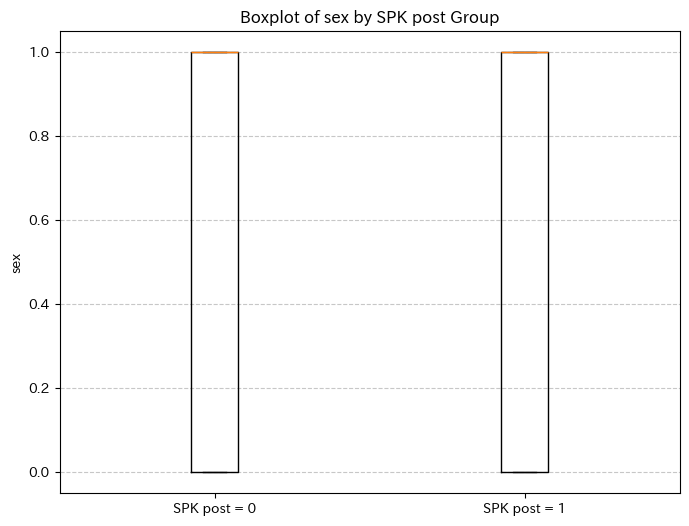

<ipython-input-7-9b1c30fd309d>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['SPK post = 0', 'SPK post = 1'])


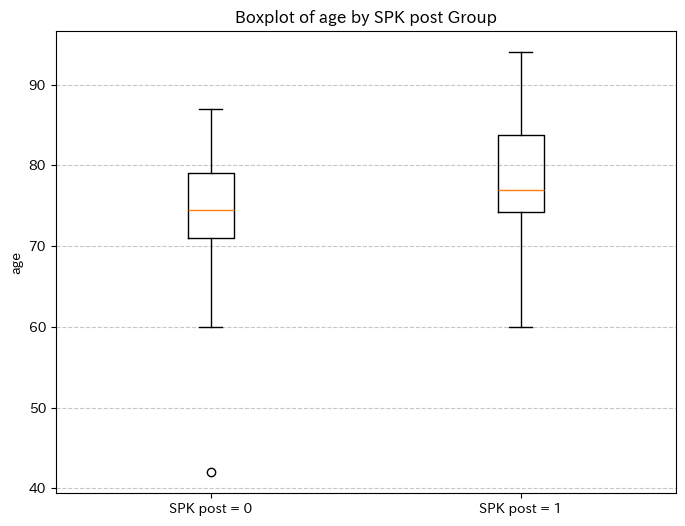

<ipython-input-7-9b1c30fd309d>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['SPK post = 0', 'SPK post = 1'])


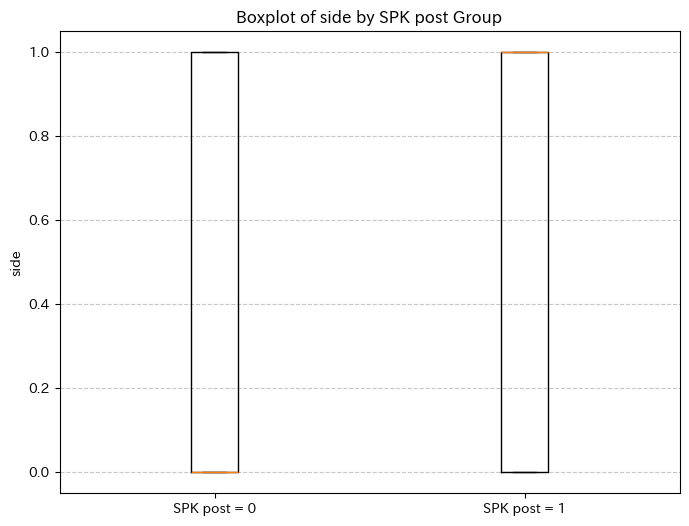

<ipython-input-7-9b1c30fd309d>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['SPK post = 0', 'SPK post = 1'])


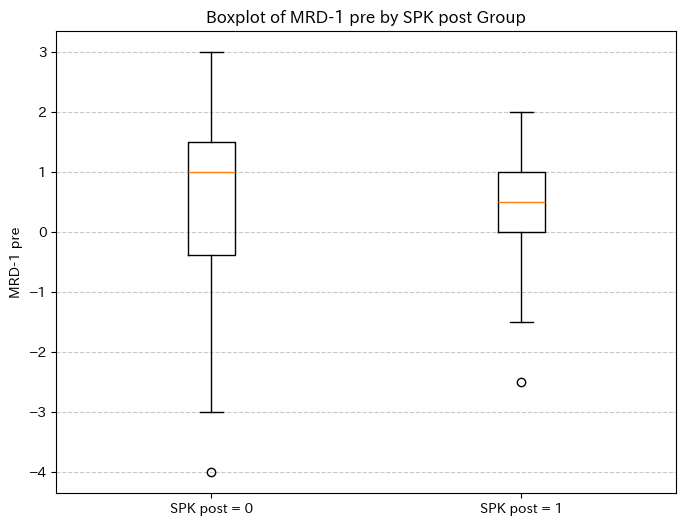

<ipython-input-7-9b1c30fd309d>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['SPK post = 0', 'SPK post = 1'])


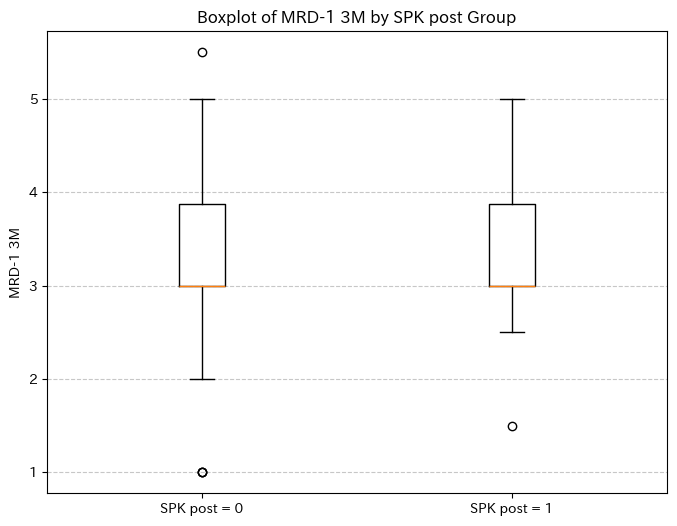

<ipython-input-7-9b1c30fd309d>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['SPK post = 0', 'SPK post = 1'])


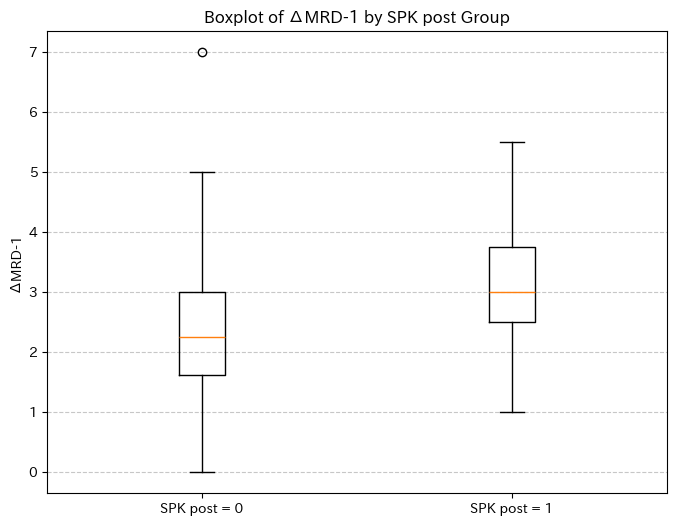

<ipython-input-7-9b1c30fd309d>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['SPK post = 0', 'SPK post = 1'])


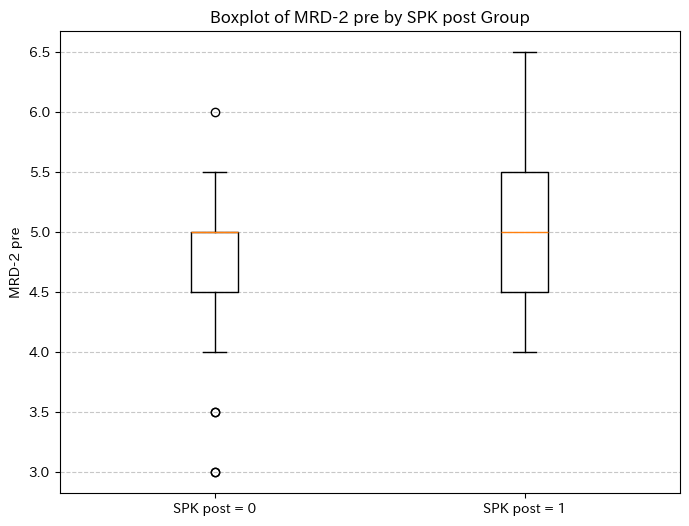

<ipython-input-7-9b1c30fd309d>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['SPK post = 0', 'SPK post = 1'])


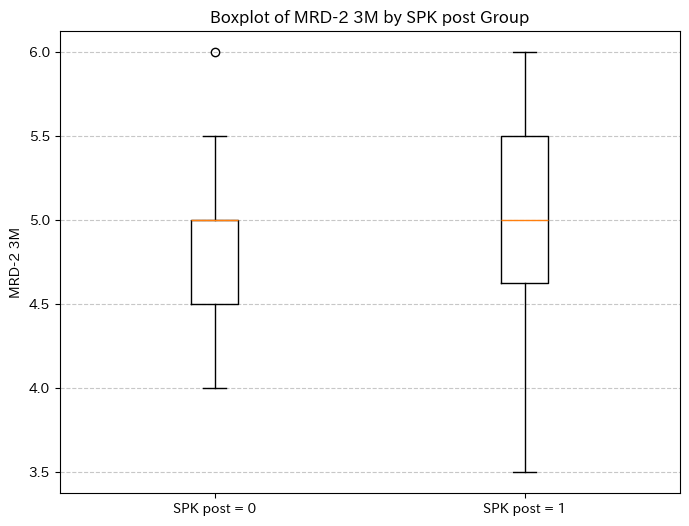

<ipython-input-7-9b1c30fd309d>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['SPK post = 0', 'SPK post = 1'])


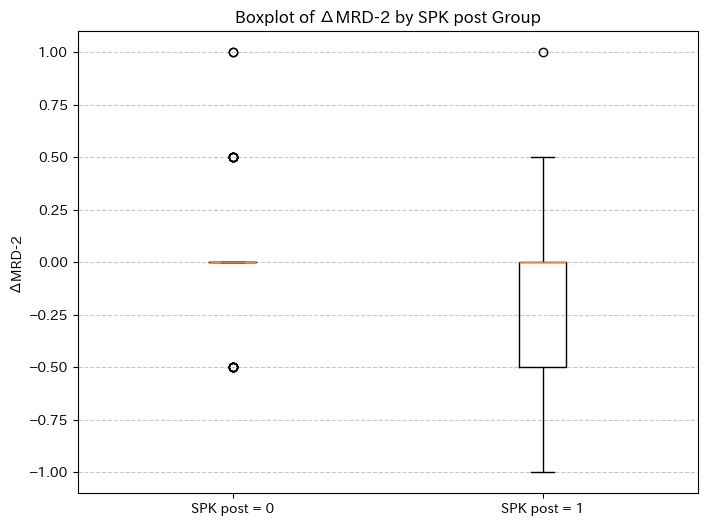

<ipython-input-7-9b1c30fd309d>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['SPK post = 0', 'SPK post = 1'])


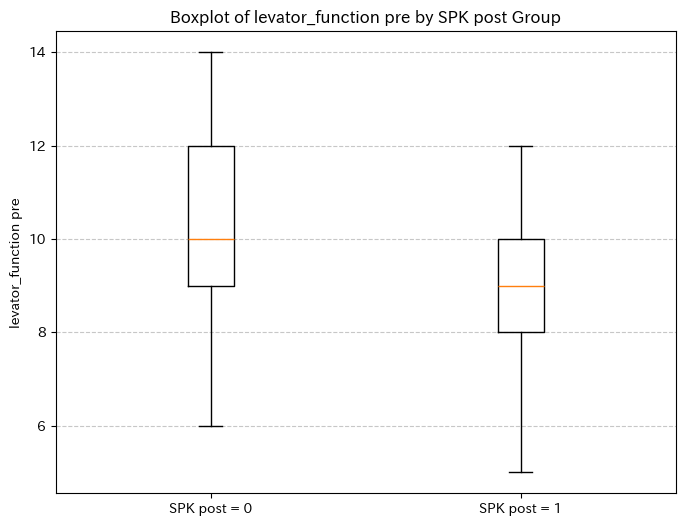

<ipython-input-7-9b1c30fd309d>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['SPK post = 0', 'SPK post = 1'])


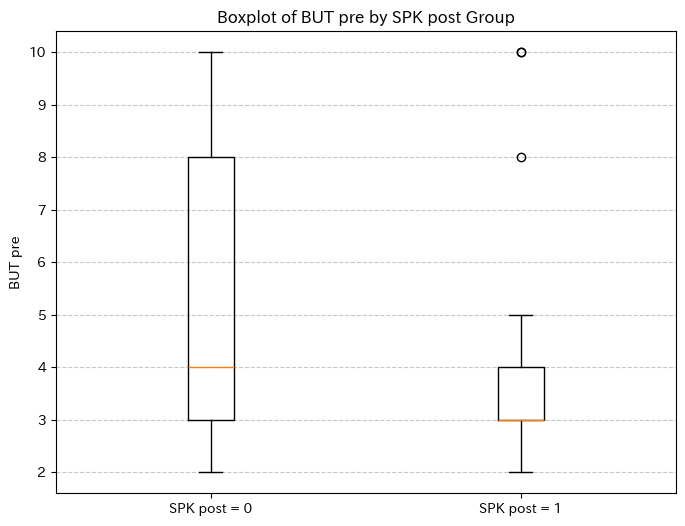

<ipython-input-7-9b1c30fd309d>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['SPK post = 0', 'SPK post = 1'])


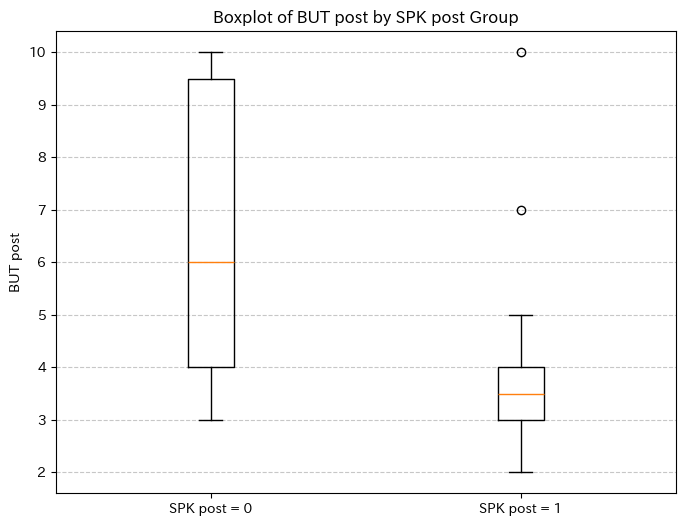

In [ ]:
import matplotlib.pyplot as plt

# Create boxplots for each variable with Group 0 and Group 1
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    data_to_plot = [group_0[var].dropna(), group_1[var].dropna()]
    plt.boxplot(data_to_plot, labels=['SPK post = 0', 'SPK post = 1'])
    plt.title(f"Boxplot of {var} by SPK post Group")
    plt.ylabel(var)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


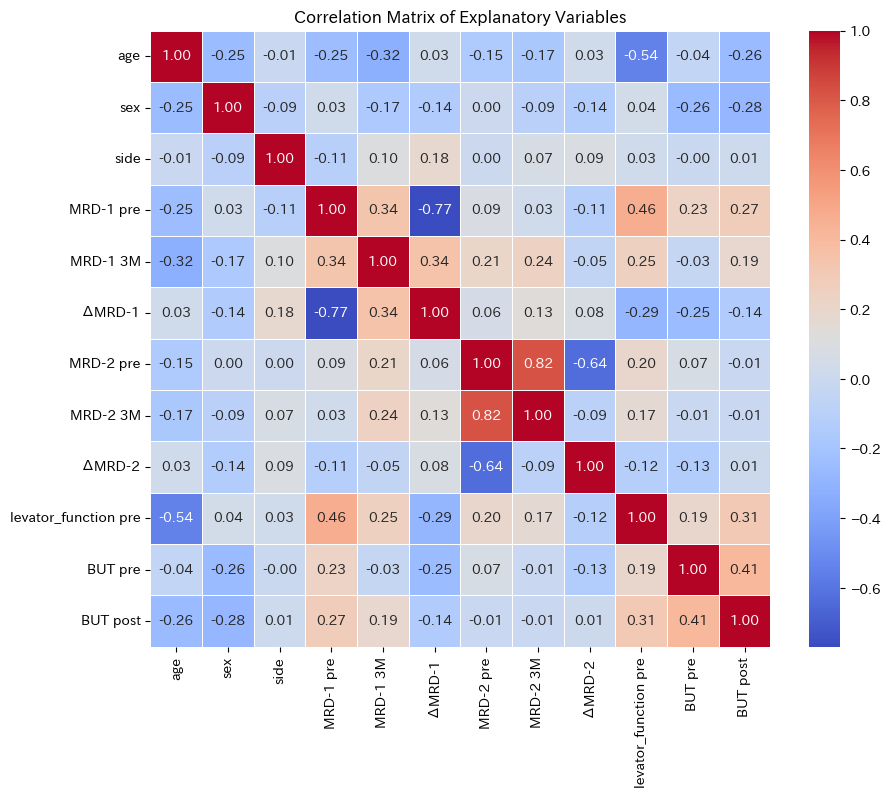

In [ ]:


# 各変数の相関を確認

import matplotlib.pyplot as plt
import seaborn as sns

# 説明変数を抽出
variables = ['age', 'sex', 'side', 'MRD-1 pre', 'MRD-1 3M', 'ΔMRD-1',
             'MRD-2 pre', 'MRD-2 3M', 'ΔMRD-2',
             'levator_function pre', 'BUT pre', 'BUT post']
correlation_data = cleaned_data[variables]

# 相関行列を計算
correlation_matrix = correlation_data.corr()

# 相関行列のヒートマップを作成
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Explanatory Variables')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Box-Tidwellテスト関数（マイナス値対策済み）
def box_tidwell_test(data, predictors, target, alpha=0.05):
    """
    改良版Box-Tidwellテスト
    - マイナス値がある変数にはshiftを追加
    - ゼロ値には微小値を追加
    """
    results = []

    for var in predictors:
        # 変数の調整
        min_val = data[var].min()
        shift = 0
        if min_val <= 0:
            shift = abs(min_val) + 1e-8
            adjusted_var = data[var] + shift
        else:
            adjusted_var = data[var].copy()

        # 交互作用項の作成
        data[f'{var}_log'] = adjusted_var * np.log(adjusted_var)

        # モデル構築
        X = sm.add_constant(pd.DataFrame({
            var: data[var],
            f'interaction': data[f'{var}_log']
        }))
        y = data[target]

        # ロジスティック回帰
        try:
            model = sm.Logit(y, X).fit(disp=0)
            p_value = model.pvalues['interaction']
            coef = model.params['interaction']
        except:
            p_value = np.nan
            coef = np.nan

        # 結果保存
        linear_check = "○" if p_value > alpha else "×"
        results.append({
            '変数': var,
            'P値': round(p_value,4),
            '係数': round(coef,4),
            '線形性': linear_check,
            '調整方法': f'shift +{shift:.2f}' if shift>0 else '-'
        })

        # 一時変数削除
        del data[f'{var}_log']

    return pd.DataFrame(results)

# 説明変数と目的変数の指定
predictors = [
    'age', 'sex', 'side', 'MRD-1 pre', 'MRD-1 3M', 'ΔMRD-1',
    'MRD-2 pre', 'MRD-2 3M', 'ΔMRD-2',
    'levator_function pre', 'BUT pre', 'BUT post',
]
target = 'SPK post'

# Box-Tidwellテスト実行
bt_results = box_tidwell_test(cleaned_data, predictors, target)
print("=== Box-Tidwellテスト結果 ===")
print(bt_results)

# 線形性の可視化
def plot_logit_relationship(data, var, target, bins=5):
    """ロジット関係の可視化（エラー処理追加版）"""
    plt.figure(figsize=(8,6))

    try:
        # ビン分割の調整
        unique_values = data[var].nunique()
        actual_bins = min(bins, unique_values)

        if actual_bins < 2:
            raise ValueError("Insufficient unique values for binning")

        # 分位数ベースのビン分割
        try:
            data['bin'] = pd.qcut(data[var], actual_bins, duplicates='drop')
        except:
            data['bin'] = pd.cut(data[var], actual_bins)

        # ビンごとの統計量計算
        bin_stats = data.groupby('bin', observed=False).agg({
            var: 'mean',
            target: 'mean'
        }).reset_index()

        # 有効なデータのみフィルタリング
        bin_stats = bin_stats.dropna(subset=[var, target])
        bin_stats['logit'] = np.log((bin_stats[target] + 1e-8) / (1 - bin_stats[target] + 1e-8))
        bin_stats = bin_stats[np.isfinite(bin_stats['logit'])]

        if len(bin_stats) < 2:
            raise ValueError("Not enough valid bins after filtering")

        # 線形回帰の実行（エラー処理付き）
        try:
            coeffs = np.polyfit(bin_stats[var], bin_stats['logit'], 1)
            trend_line = np.poly1d(coeffs)(bin_stats[var])
            line_label = f'Linear trend (slope={coeffs[0]:.2f})'
        except np.linalg.LinAlgError:
            trend_line = None
            line_label = 'Linear trend (failed to calculate)'

        # プロット
        plt.scatter(bin_stats[var], bin_stats['logit'], s=50, label='Actual data')
        if trend_line is not None:
            plt.plot(bin_stats[var], trend_line, color='red', linestyle='--', label=line_label)

        plt.xlabel(var)
        plt.ylabel('Logit')
        plt.title(f'{var} vs Logit')
        plt.legend()
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"Error plotting {var}: {str(e)}")
        plt.close()

# 各変数のプロット
print("\n=== 線形性の可視化 ===")
for var in predictors:
    plot_logit_relationship(cleaned_data, var, target)
    plt.close()

# 多重共線性チェック
def check_vif(data, predictors):
    """VIFの計算"""
    X = sm.add_constant(data[predictors])
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

print("\n=== 多重共線性チェック（変換前）===")
print(check_vif(cleaned_data, predictors))

# 非線形性対策後の変換例（必要に応じて実行）
if not bt_results[bt_results['線形性'] == '×'].empty:
    print("\n=== 非線形性対策の例 ===")
    for var in bt_results[bt_results['線形性'] == '×']['変数']:
        # 平方項の追加
        cleaned_data[f'{var}_sq'] = cleaned_data[var]**2
        # 対数変換（正の値のみ）
        if cleaned_data[var].min() > 0:
            cleaned_data[f'log_{var}'] = np.log(cleaned_data[var])
        print(f"Created {var}_sq and log_{var} (if applicable)")

    # 変換後のVIFチェック
    new_predictors = predictors + [f'{var}_sq' for var in bt_results[bt_results['線形性'] == '×']['変数']]
    print("\n=== 多重共線性チェック（変換後）===")
    print(check_vif(cleaned_data, new_predictors))

In [ ]:
# 変数の再定義（例：術前値と変化量を採用）
selected_vars = [
    'MRD-1 pre', 'ΔMRD-1',
    'MRD-2 pre', 'ΔMRD-2',
    'levator_function pre',
    'BUT pre', 'BUT post',
]

# 削除する変数を明示的に指定
vars_to_drop = ['MRD-1 3M', 'MRD-2 3M']
cleaned_data_revised = cleaned_data.drop(columns=vars_to_drop)

# VIFの再計算
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(data, predictors):
    X = sm.add_constant(data[predictors])
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

revised_predictors = [
    'sex','age','side','MRD-1 pre', 'ΔMRD-1',
    'MRD-2 pre', 'ΔMRD-2',
    'levator_function pre',
    'BUT pre', 'BUT post',
]

print(calculate_vif(cleaned_data_revised, revised_predictors))

                Variable         VIF
0                  const  428.576139
1                    sex    1.494649
2                    age    1.832308
3                   side    1.057297
4              MRD-1 pre    3.217622
5                 ΔMRD-1    3.143541
6              MRD-2 pre    1.875511
7                 ΔMRD-2    1.858961
8   levator_function pre    1.790313
9                BUT pre    1.379182
10              BUT post    1.478524


###**Logistic regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 説明変数と目的変数の設定
X = cleaned_data[['sex','age','side','MRD-1 pre', 'MRD-1 3M', 'ΔMRD-1',
                  'MRD-2 pre', 'MRD-2 3M', 'ΔMRD-2',
                  'levator_function pre', 'BUT pre', 'BUT post']]
y = cleaned_data['SPK post']

# データ分割 (80%をトレーニング用、20%をテスト用に分割)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ロジスティック回帰モデルの構築
logistic_model = LogisticRegression(class_weight='balanced', max_iter=1000)
logistic_model.fit(X_train, y_train)

# テストデータで予測
y_pred = logistic_model.predict(X_test)
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]

# モデル評価
print("=== Logistic Regression Results ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))


=== Logistic Regression Results ===
Confusion Matrix:
 [[6 3]
 [2 7]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.67      0.71         9
         1.0       0.70      0.78      0.74         9

    accuracy                           0.72        18
   macro avg       0.72      0.72      0.72        18
weighted avg       0.73      0.72      0.72        18


ROC-AUC Score: 0.8024691358024691


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, roc_auc_score

# ロジスティック回帰モデルの定義
logistic_model = LogisticRegression(class_weight='balanced', max_iter=1000)

# 評価指標を指定
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# クロスバリデーションを実行 (5分割)
cv_results = cross_validate(
    logistic_model, X, y, cv=5, scoring=scoring, return_train_score=True
)

# クロスバリデーション結果の表示
print("=== Cross-Validation Results ===")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean Precision: {cv_results['test_precision'].mean():.3f}")
print(f"Mean Recall: {cv_results['test_recall'].mean():.3f}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.3f}")
print(f"Mean ROC-AUC: {cv_results['test_roc_auc'].mean():.3f}")


=== Cross-Validation Results ===
Mean Accuracy: 0.622
Mean Precision: 0.583
Mean Recall: 0.725
Mean F1 Score: 0.620
Mean ROC-AUC: 0.700


In [ ]:
import statsmodels.api as sm
import numpy as np

# 結果を保存するリスト
univariate_results = []

# 各説明変数で単変量ロジスティック回帰を実行
for var in X.columns:
    X_single = sm.add_constant(X[[var]])  # 定数項を追加
    model = sm.Logit(y, X_single).fit(disp=0)  # モデルを適合
    coef = model.params[var]
    p_value = model.pvalues[var]
    odds_ratio = np.exp(coef)  # オッズ比を計算
    univariate_results.append({
        'Variable': var,
        'Coefficient': coef,
        'Odds Ratio': odds_ratio,
        'P-Value': p_value
    })

# 結果をデータフレームに変換して表示
univariate_results_df = pd.DataFrame(univariate_results)
univariate_results_df = univariate_results_df.sort_values(by='P-Value')  # P値でソート

print("\n=== Univariate Logistic Regression Results ===")
print(univariate_results_df)




=== Univariate Logistic Regression Results ===
                Variable  Coefficient  Odds Ratio   P-Value
11              BUT post    -0.511835    0.599394  0.000150
10               BUT pre    -0.254571    0.775249  0.010571
9   levator_function pre    -0.240768    0.786024  0.025203
0                    sex     0.606136    1.833333  0.175536
2                   side     0.543443    1.721925  0.204536
3              MRD-1 pre    -0.184993    0.831110  0.230229
7               MRD-2 3M     0.361992    1.436187  0.269799
1                    age     0.030329    1.030793  0.270971
5                 ΔMRD-1     0.164736    1.179082  0.283172
6              MRD-2 pre     0.224071    1.251160  0.376857
4               MRD-1 3M    -0.041205    0.959632  0.853013
8                 ΔMRD-2    -0.021485    0.978744  0.961042


###**Stepwise法**

In [ ]:
import statsmodels.api as sm

# 説明変数と目的変数を準備
X = cleaned_data[['MRD-1 pre', 'MRD-1 3M', 'ΔMRD-1',
                  'MRD-2 pre', 'MRD-2 3M', 'ΔMRD-2',
                  'levator_function pre', 'BUT pre', 'BUT post']]
# X = cleaned_data[['MRD-1 pre', 'MRD-1 3M', 'ΔMRD-1',
#                   'MRD-2 pre', 'MRD-2 3M', 'ΔMRD-2',
#                   'levator_function pre']]
y = cleaned_data['SPK post']

# ステップワイズ法による変数選択関数
def stepwise_selection(X, y,
                       initial_features=[],
                       threshold_in=0.05,
                       threshold_out=0.1,
                       verbose=True):
    """AICに基づくステップワイズ法"""
    included = list(initial_features)
    while True:
        changed = False
        # 追加候補の変数を確認
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype=float)
        for new_col in excluded:
            model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included + [new_col]]))).fit(disp=0)
            new_pval[new_col] = model.pvalues[new_col]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f"Added {best_feature} with p-value {best_pval:.6f}")

        # 除去候補の変数を確認
        model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included]))).fit(disp=0)
        pvalues = model.pvalues.iloc[1:]  # 定数項を除く
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            changed = True
            if verbose:
                print(f"Removed {worst_feature} with p-value {worst_pval:.6f}")

        if not changed:
            break
    return included

# ステップワイズ法の実行
selected_features = stepwise_selection(X, y, verbose=True)
print("\nSelected features:", selected_features)

# 最終モデルの構築
X_selected = sm.add_constant(X[selected_features])
final_model = sm.Logit(y, X_selected).fit()

# モデルの要約結果を表示
print(final_model.summary())

# 回帰係数とオッズ比の計算
coefficients = final_model.params
odds_ratios = np.exp(coefficients)

# 回帰係数とオッズ比を出力
print("\n=== Coefficients and Odds Ratios ===")
for feature, coef, odds in zip(X_selected.columns, coefficients, odds_ratios):
    print(f"{feature}: Coef = {coef:.3f}, Odds Ratio = {odds:.3f}")

Added BUT post with p-value 0.000150

Selected features: ['BUT post']
Optimization terminated successfully.
         Current function value: 0.562950
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               SPK post   No. Observations:                   90
Model:                          Logit   Df Residuals:                       88
Method:                           MLE   Df Model:                            1
Date:                Sat, 25 Jan 2025   Pseudo R-squ.:                  0.1805
Time:                        04:56:21   Log-Likelihood:                -50.665
converged:                       True   LL-Null:                       -61.827
Covariance Type:            nonrobust   LLR p-value:                 2.305e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1591      0.622      

###**Decision tree**

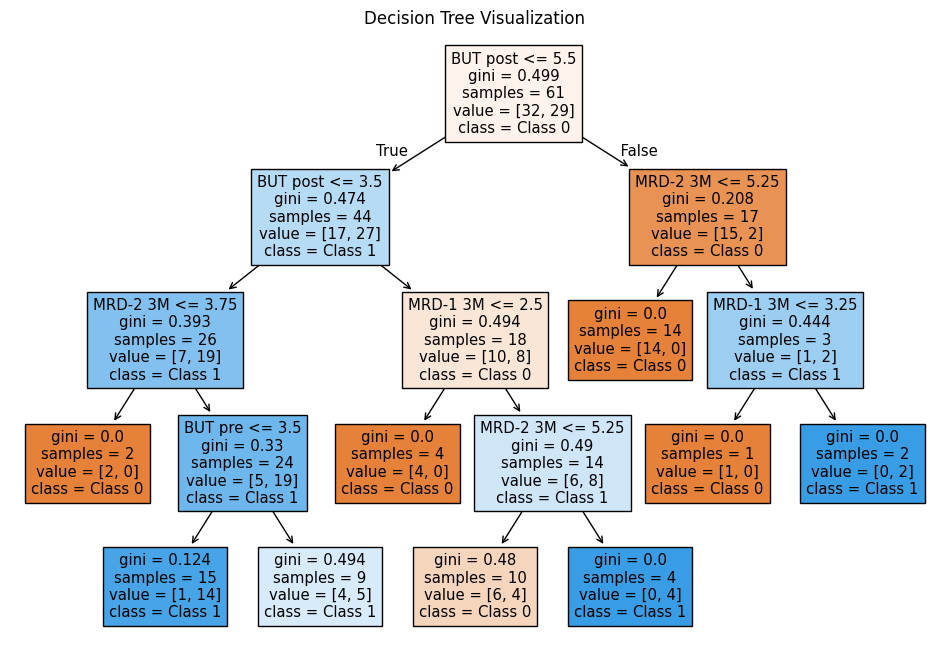

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 決定木モデルの構築
tree_model = DecisionTreeClassifier(random_state=42, max_depth=4)  # max_depthを調整可能
tree_model.fit(X_train, y_train)

# 決定木の可視化
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=X.columns, class_names=['Class 0', 'Class 1'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


In [ ]:
# テストデータで予測
y_pred = tree_model.predict(X_test)

# 混同行列と分類レポート
print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))



=== Confusion Matrix ===
[[9 5]
 [5 8]]

=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.64      0.64      0.64        14
         1.0       0.62      0.62      0.62        13

    accuracy                           0.63        27
   macro avg       0.63      0.63      0.63        27
weighted avg       0.63      0.63      0.63        27



<ipython-input-56-fb83c0cd1aae>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


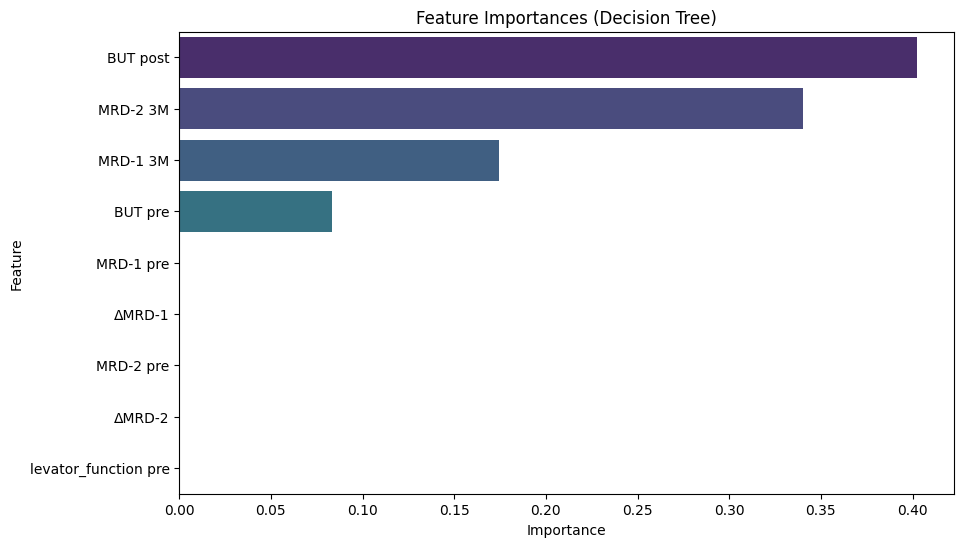

In [ ]:
import pandas as pd
import seaborn as sns

# 特徴重要度を取得
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 特徴重要度の可視化
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title("Feature Importances (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


###**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# ランダムフォレストモデルの構築
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5, class_weight="balanced")  # max_depthやn_estimatorsを調整可能
rf_model.fit(X_train, y_train)

# テストデータで予測
y_pred = rf_model.predict(X_test)

# モデル評価
print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))



=== Confusion Matrix ===
[[11  4]
 [ 3  9]]

=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.79      0.73      0.76        15
         1.0       0.69      0.75      0.72        12

    accuracy                           0.74        27
   macro avg       0.74      0.74      0.74        27
weighted avg       0.74      0.74      0.74        27



<ipython-input-174-4bc7e1794d01>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


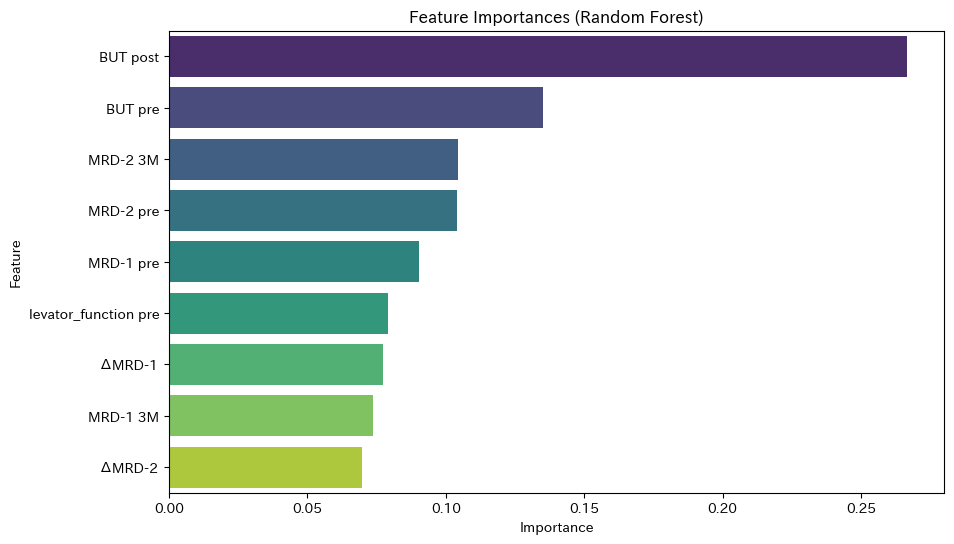

In [ ]:
import pandas as pd
import seaborn as sns

# 特徴重要度の取得
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 特徴重要度の可視化
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


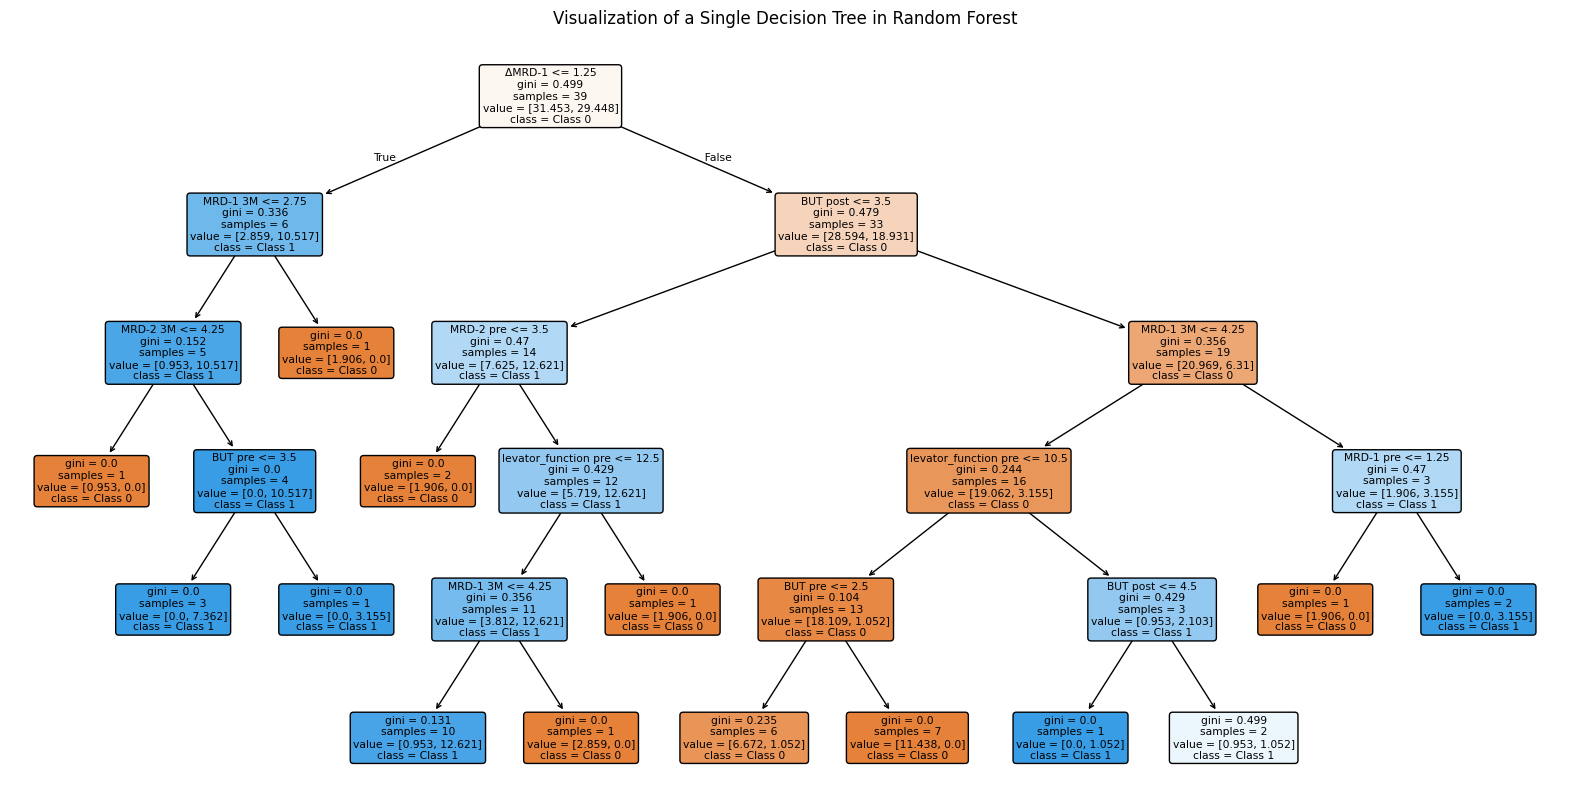

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# ランダムフォレストから1本の木を選択
single_tree = rf_model.estimators_[0]  # ランダムフォレストの最初の木を取得

# 決定木の可視化
plt.figure(figsize=(20, 10))
plot_tree(single_tree, feature_names=X.columns, class_names=["Class 0", "Class 1"], filled=True, rounded=True)
plt.title("Visualization of a Single Decision Tree in Random Forest")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# パラメータのグリッド
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# グリッドサーチの実行
grid_search = GridSearchCV(RandomForestClassifier(random_state=42, class_weight="balanced"), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 最適なパラメータとスコア
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# 最適なモデルで再構築
best_rf_model = grid_search.best_estimator_


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Score: 0.7705128205128206


In [ ]:
# 最適なモデルを使って評価
y_pred_best = best_rf_model.predict(X_test)

# 評価結果の出力
print("\n=== Confusion Matrix (Optimized) ===")
print(confusion_matrix(y_test, y_pred_best))

print("\n=== Classification Report (Optimized) ===")
print(classification_report(y_test, y_pred_best))



=== Confusion Matrix (Optimized) ===
[[11  3]
 [ 6  7]]

=== Classification Report (Optimized) ===
              precision    recall  f1-score   support

         0.0       0.65      0.79      0.71        14
         1.0       0.70      0.54      0.61        13

    accuracy                           0.67        27
   macro avg       0.67      0.66      0.66        27
weighted avg       0.67      0.67      0.66        27

